This notebook is a utility to convert coordinate pair grids in .csv format to a .nc format for use of xarray in data processing.

In [8]:
import numpy as np
import xarray as xr
import pandas as pd

conv = pd.read_csv('/content/EMMpotentialonPredictorMesh.csv')
example = xr.open_dataset('/content/CM_CURIE_POINT_DEPTH_KM_Li2017.5m_EASE9262.68m.nc')
conv.head()

,Longitude,Latitude,EMM_MagPotential_Data
0,-179.952,-88.826444,NaN
1,-179.856,-88.826444,-3644.071601
2,-179.760,-88.826444,-3651.525160
3,-179.664,-88.826444,-3647.172857
4,-179.568,-88.826444,-3648.765812


load the grid values into a nparray, and use shape of .nc example to reshape our 1D array




In [9]:
conv_grid = np.asarray(conv['EMM_MagPotential_Data'])
example_data = np.asarray(example['z'])

conv_grid = conv_grid.reshape(example_data.shape)

select the lat and lon arrays from  exmaple grid and use to create the .nc file

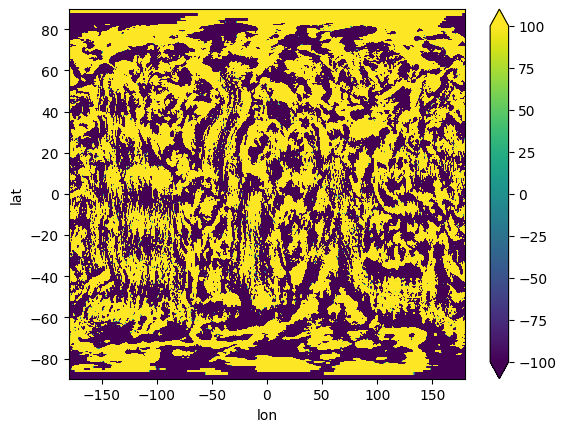

In [10]:
data_array = xr.DataArray(conv_grid, dims=['lat','lon'], coords= {'lat': example['lat'].values , 'lon': example['lon'].values})
data_array.plot(vmin=-100, vmax=100)
data_array.to_netcdf('interpolated_EMM_from_csv.nc')

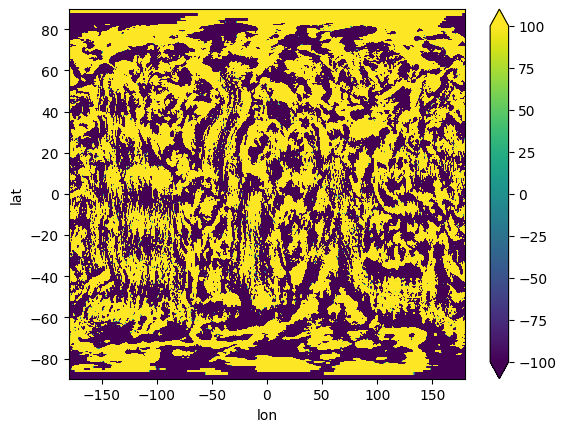

In [12]:
conv = pd.read_csv('/content/EMMpotentialonPredictorMesh.csv')
conv_grid = np.asarray(conv['EMM_MagPotential_Data'])
example_data = np.asarray(example['z'])

conv_grid = conv_grid.reshape(example_data.shape)

data_array = xr.DataArray(conv_grid, dims=['lat','lon'], coords= {'lat': example['lat'].values , 'lon': example['lon'].values})
data_array.plot(vmin=-100, vmax=100)
data_array.to_netcdf('interpolated_EMM_from_csv.nc')